### Types of Feature Selection Technique.

#### 1) Filter Method  (ANOVA, Pearson correlation, variance thresholding).
#### 2) Wrapper Method (forward, backward, and stepwise selection).
#### 3) Embedded methods (Lasso, Ridge, Decision Tree).

### Advantages of Feature Selection.

1) Model with less number of feature have higher explainability.

2) It is easier to implement machine learning models with reduce feature.

3) Feature Selection remove the data redundancy.

4) Training time of model with fewer feature is significantly lower.

5) Model with low feature are less prone to error.

### 1) Filter Method

#### 1) Univariate Filter Method:-
 Univariate Filter are type filter where individual features are ranked according to specific criteria.And Top N feature are  selected.Ranked criteria are used in Univariate filter method are like (fisher score,mutual information,variance of feature).
 
       1) Constant Removal.
       2) Quasi Constant Removal.
       3) Duplicate Feature Removal.

In [1]:
# importing important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('Sentander Dataset//santander_train.csv',nrows=20000)

In [3]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


#### Splitting data into Independent and Dependent Variable.

In [4]:
X=data.drop('TARGET',axis=1)
y=data['TARGET']

In [5]:
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

### Splitting data into training and testing set.

In [7]:
## Importing Libraries.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

In [8]:
x_train.shape,x_test.shape

((14000, 370), (6000, 370))

#### 1) Constant Feature Removal.

In [9]:
### creating the Variance Threshold.
from sklearn.feature_selection import VarianceThreshold

In [10]:
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [11]:
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [12]:
## Getting non_constant Features.
constant_filter.get_support().sum()

287

In [13]:
## Finding the constant columns.
constant_columns=[columns for columns in x_train.columns
                  if columns not in x_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

83


In [14]:
## Printing all constant columns.
for columns in constant_columns:
    print(columns)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

#### Removing all Constant Feature from dataset.

In [15]:
## Dropping all constant columns.
x_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
5713,11466,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89887.770000
4034,8084,2,49,0.0,1262.19,1262.19,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264185.790000
18009,36074,2,27,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235899.060000
8720,17560,2,43,0.0,78.00,78.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85645.740000
13549,27131,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131480.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,10783,2,23,0.0,53.85,53.85,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161478.510000
19117,38333,2,25,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53324.460000
13166,26389,2,34,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56028.480000
8605,17327,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


#### 2) Quasi Constant Removal.
This are the feature are almost constant.
Quasi constant are such feature which having same values for large subset of features.

In [16]:
quasi_constant_filters=VarianceThreshold(threshold=0.01)
quasi_constant_filters.fit(x_train)

VarianceThreshold(threshold=0.01)

In [17]:
quasi_constant_filters.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [18]:
## Not quasi constant filters.
quasi_constant_filters.get_support().sum()

242

In [19]:
## Finding the constant columns.
quasi_constant_columns=[columns for columns in x_train.columns
                        if columns not in x_train.columns[quasi_constant_filters.get_support()]]

print(len(quasi_constant_columns))

128


In [20]:
## Printing all constant columns.
for columns in quasi_constant_columns:
    print(columns)

ind_var1
ind_var2_0
ind_var2
ind_var6_0
ind_var6
ind_var13_largo_0
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var41
ind_var39
ind_var44_0
ind_var44
ind_var46_0
ind_var46
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_op_var40_hace3
num_var27_0
num_var28_0
num_var28
num_var27
num_var29_0
num_var29
num_var33_0
num_var33
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_aport_var33_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_aport_var33_1y3


In [22]:
## Dropping allquasi_constant_features.
x_train.drop(quasi_constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
5713,11466,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89887.770000
4034,8084,2,49,0.0,1262.19,1262.19,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264185.790000
18009,36074,2,27,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235899.060000
8720,17560,2,43,0.0,78.00,78.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85645.740000
13549,27131,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131480.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,10783,2,23,0.0,53.85,53.85,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161478.510000
19117,38333,2,25,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53324.460000
13166,26389,2,34,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56028.480000
8605,17327,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


#### 3) Duplicate Feature Removal.

When two columns/features are exaclty same at that time we say that those feature are duplicate features/columns.

In [ ]:
 x_train_T=x_train_quasi_filter.T
 x_test_T=x_test_quasi_filter.T 

In [ ]:
type(x_train_T)

In [ ]:
type(x_test_T)

In [ ]:
### Changing the ndarary into pandas Dataframe.
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [ ]:
x_train_T.shape,x_test_T.shape

In [ ]:
### finding the how many features are duplicate.
x_train_T.duplicated().sum()

In [ ]:
x_test_T.duplicated().sum()

In [ ]:
### Removing all duplicate feature we get.
duplicate_features=x_train_T.duplicated()
duplicate_features

In [ ]:
### Selecting the non_duplicated rows.
non_duplicated_feature=[not index for index in duplicate_features]

In [ ]:
non_duplicated_feature

#### Removing quasi constant features.

In [ ]:
## Dropping all constant columns.
x_train.drop(quasi_constant_columns,axis=1)

### Building the model and comapring the performance of selected features.

In [23]:
## Importing Important Libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
## creating the method.
def random_forest_cls(x_train,x_test,y_train,y_test):
    cls=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    cls.fit(x_train,y_train)
    y_pred=cls.predict(x_test)
    print("Accuracy =",accuracy_score(y_test,y_pred))

In [25]:
### Calling Random forest Function.
### Finding the accuracy of constant,Quasi constant and Duplicate feature removla dataset.
#random_forest_cls(x_train_unique,x_test_unique,y_train,y_test)

In [26]:
## Finding the accuracy of original dataset.
random_forest_cls(x_train,x_test,y_train,y_test)

Accuracy = 0.9583333333333334


In [28]:
x_train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.023828,-0.000287,0.004990,0.000524,-0.004561,-0.013407,-0.016350,0.003384,0.002048,...,-0.001461,0.001601,-0.009134,0.006760,0.005974,0.012541,0.000474,0.013627,0.013787,0.007386
var3,-0.023828,1.000000,-0.008835,0.001790,0.009077,0.009217,0.001594,0.001784,0.000602,0.000682,...,0.000588,0.000606,0.000365,0.000582,0.000592,0.000881,0.000632,0.000869,0.000928,0.000448
var15,-0.000287,-0.008835,1.000000,0.032301,0.108891,0.112017,0.048509,0.060305,0.003398,0.005246,...,0.027238,0.020673,0.012319,0.020248,0.020324,0.042364,0.019193,0.044492,0.044796,-0.001320
imp_ent_var16_ult1,0.004990,0.001790,0.032301,1.000000,0.027002,0.021600,0.014974,0.015892,-0.000577,-0.000651,...,0.014061,-0.000581,-0.000350,-0.000558,-0.000567,0.000688,-0.000607,0.000282,0.000300,0.001103
imp_op_var39_comer_ult1,0.000524,0.009077,0.108891,0.027002,1.000000,0.895523,0.394585,0.360526,0.004187,0.011303,...,0.002581,0.015828,-0.001774,0.021339,0.021768,-0.001654,0.002141,-0.002431,-0.002554,0.000994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,0.012541,0.000881,0.042364,0.000688,-0.001654,0.001223,-0.000749,-0.000831,-0.000284,-0.000321,...,0.013337,0.022662,-0.000173,0.033765,0.031599,1.000000,0.173294,0.952177,0.933571,0.007914
saldo_medio_var44_hace3,0.000474,0.000632,0.019193,-0.000607,0.002141,0.021840,-0.000537,-0.000596,-0.000204,-0.000230,...,-0.000200,-0.000205,-0.000124,-0.000197,-0.000201,0.173294,1.000000,0.067437,0.070832,-0.001254
saldo_medio_var44_ult1,0.013627,0.000869,0.044492,0.000282,-0.002431,-0.001537,-0.000738,-0.000819,-0.000280,-0.000317,...,0.027719,0.012514,-0.000170,0.018711,0.017501,0.952177,0.067437,1.000000,0.993738,0.007209
saldo_medio_var44_ult3,0.013787,0.000928,0.044796,0.000300,-0.002554,-0.001639,-0.000789,-0.000875,-0.000300,-0.000338,...,0.023309,0.014711,-0.000182,0.021978,0.020560,0.933571,0.070832,0.993738,1.000000,0.007497


### Feature Selection with Autocorrelation (Pearson Correlation Coefficients).

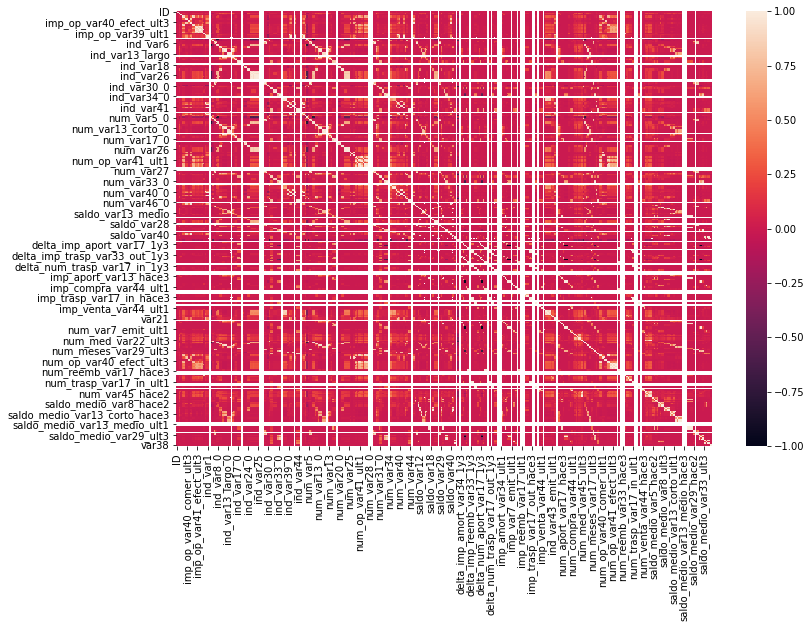

In [32]:
### Finding the correlation of independent and dependent features.
plt.figure(figsize=(12,8))
cormat=x_train.corr()
sns.heatmap(cormat)
plt.show()

In [30]:
## removing the correlataed features.
def get_correlation(data,threshold):
    corr_col=set()
    cormat=data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j])>threshold:
                colname=cormat.columns[i]
                corr_col.add(colname)
    return corr_col
            

In [ ]:
### Finding the correlated features.
corr_features=get_correlation(x_train_unique,0.85)
corr_features

In [ ]:
### Finding the lengh of correlated features.
len(corr_features)

In [ ]:
### Dropping all highly correlated features.
x_train_corr=x_train_unique.drop(labels=corr_features,axis=1)
x_test_corr=x_test_unique.drop(labels=corr_features,axis=1)

In [ ]:
x_train_corr.shape,x_test_corr.shape

In [ ]:
### Calling Random Forest Function.
random_forest_cls(x_train_corr,x_test_corr,y_train,y_test)
